In [187]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset
import pandas as pd

### Задача 1

Функция потерь $\mathcal{L} = \sum_{i = 1}^{l} (y_i - \tilde{y})^2$ есть функция одной переменной $\tilde{y}$. 

$\partial_{\tilde{y}}\mathcal{L} = \sum_{i = 1}^{l} 2(\tilde{y} - y_i) = 0 \quad \Leftrightarrow \quad \tilde{y} = \bar{y}$,

где $\bar{y}$  -- среднее по выборке.

### Задача 2
Для четырех выборок из квартета Энскомба вычислите выборочные дисперсии x и y координат, а также коэффициент линейной корреляции Пирсона. Изобразите выборки на графиках. 

Данные:

In [139]:
data = load_dataset('anscombe').to_numpy()
d1 = data[data[:,0] == 'I'][:,1:].T
d2 = data[data[:,0] == 'II'][:,1:].T
d3 = data[data[:,0] == 'III'][:,1:].T
d4 = data[data[:,0] == 'IV'][:,1:].T

Хочется много раз написать одно и то же, поэтому нужна

In [185]:
def PlotAns(data, axs, i, j):
    
    x, y = data[0], data[1]
    
    axs[i,j].scatter(x, y, c='r')
    axs[i,j].grid()
    axs[i][j].set_xlim(2, 20)
    axs[i][j].set_ylim(2, 14)
    
    vx = np.var(x)
    vy = np.var(y)
    cov_xy = np.mean((x - x.mean()) * (y - y.mean()))
    
    text = '\n'.join((
    r'$\widehat{var} ~x = %.2f$' % (vx, ),
    r'$\widehat{var} ~y = %.2f$' % (vy, ),
    r'$r = %.2f$' % (cov_xy/np.sqrt(vx * vy), )
    ))

    axs[i, j].text(3, 10, text, fontsize=14)

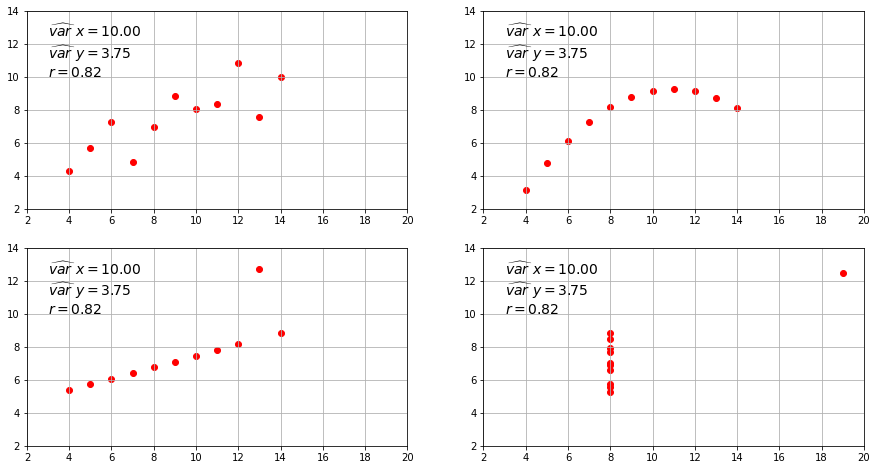

In [186]:
fig, axs = plt.subplots(2, 2, figsize = (15,8))

PlotAns(d1, axs, 0, 0)
PlotAns(d2, axs, 0, 1)
PlotAns(d3, axs, 1, 0)
PlotAns(d4, axs, 1, 1)

plt.show()

##### C вычислением ковариаии выборки встроенной в np функцией какая-то беда: он ломается из-за автоматического определения парамента shape у переменной типа float, хотя я его даже не просил

```
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-177-5ccbb38d7ec5> in <module>
     22 fig, axs = plt.subplots(2, 2, figsize = (12,8))
     23 
---> 24 PlotAns(d1, axs, 0, 0)
     25 PlotAns(d2, axs, 0, 1)
     26 PlotAns(d3, axs, 1, 0)

<ipython-input-177-5ccbb38d7ec5> in PlotAns(data, axs, i, j)
     15     r'$\widehat{var} ~y = %.2f$' % (np.var(y), ),
     16     ))
---> 17     r'$r = %.2f$' % (np.corrcoef(data[0], data[1])[0, 1], )
     18 
     19     axs[i, j].text(3., 11, textstr, fontsize=14)

<__array_function__ internals> in corrcoef(*args, **kwargs)

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py in corrcoef(x, y, rowvar, bias, ddof, dtype)
   2632         warnings.warn('bias and ddof have no effect and are deprecated',
   2633                       DeprecationWarning, stacklevel=3)
-> 2634     c = cov(x, y, rowvar, dtype=dtype)
   2635     try:
   2636         d = diag(c)

<__array_function__ internals> in cov(*args, **kwargs)

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py in cov(m, y, rowvar, bias, ddof, fweights, aweights, dtype)
   2467             w *= aweights
   2468 
-> 2469     avg, w_sum = average(X, axis=1, weights=w, returned=True)
   2470     w_sum = w_sum[0]
   2471 

<__array_function__ internals> in average(*args, **kwargs)

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py in average(a, axis, weights, returned)
    413 
    414     if returned:
--> 415         if scl.shape != avg.shape:
    416             scl = np.broadcast_to(scl, avg.shape).copy()
    417         return avg, scl

AttributeError: 'float' object has no attribute 'shape'
```

### Задача 3

$Xw = y$ -- недоопределённая система, то есть условие на переменные (веса) $w$, на котором нужно минимизировать $w^T w$. Решим задачу методом неопределённых множителей Лагранжа:

$\mathcal{L} = w^T w + \lambda^T (Xw - y)$

$\partial_w\mathcal{L} = 2w^T + \lambda^T X = 0 \quad (1)$

$\partial_\lambda\mathcal{L} = Xw - y = 0\quad (2)$

Транспонируем (1) и подставим в (2), чтобы найти $\lambda$:

$2 y = 2Xw = - X X^T\lambda \quad \Rightarrow \quad \lambda = -2(X X^T)^{-1} y$

Тогда из (1)

$w = X^T(X X^T)^{-1} y$ -- то есть $w$ суть действие правой псевдообратной $X$ матрицы на $y$.

### Задача 4

In [192]:
data = pd.read_excel('5.5.1.xlsx', sheet_name=1)
data

,"Толщина, см",log,Счетчик,"Время, с"
0,2.00,0.652172,23200,10
1,3.95,1.226727,13102,10
2,5.93,1.799545,7430,10
3,7.96,2.332406,4400,10
4,9.96,2.711374,3042,10
5,11.98,3.209903,1885,10
6,13.99,3.560166,1356,10


In [191]:
def LinearFit(x, y):
    w1 = np.cov([x, y])[0,1] / np.var(x)
    w0 = np.mean(y) - w1 * np.mean(x)
    return w1, w0

In [196]:
x = data["Толщина, см"].to_numpy()
y = data["log"].to_numpy()

In [214]:
from scipy import stats
res = stats.linregress(x, y)
a, b = res.slope, res.intercept

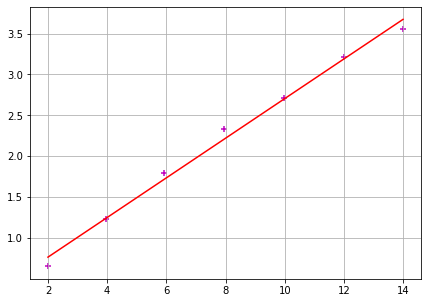

In [215]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, a * x + b, c="r")
ax.scatter(x, y, marker='+', c="m")
ax.grid()
plt.show()